## ETHEREUM COIN PRICE PREDICTION

In [1]:
import pandas as pd
Ethereum_data = pd.read_csv("ETHEREUM_DATA.csv")
Ethereum_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-2018,755.757019,782.530029,742.004028,772.640991,772.640991,2595760128
1,02-01-2018,772.346008,914.830017,772.346008,884.443970,884.443970,5783349760
2,03-01-2018,886.000000,974.471008,868.450989,962.719971,962.719971,5093159936
3,04-01-2018,961.713013,1045.079956,946.085999,980.921997,980.921997,6502859776
4,05-01-2018,975.750000,1075.390015,956.325012,997.719971,997.719971,6683149824
...,...,...,...,...,...,...,...
2246,25-02-2024,2992.366699,3117.428955,2984.393066,3112.697266,3112.697266,14620450464
2247,26-02-2024,3112.529053,3197.375000,3037.954590,3178.993652,3178.993652,17504464351
2248,27-02-2024,3178.405029,3287.958008,3167.830566,3244.519287,3244.519287,21090315368
2249,28-02-2024,3243.893311,3485.450928,3201.575928,3385.703857,3385.703857,32885894265


In [2]:
Data = Ethereum_data.reset_index()["Close"]
Data.head()

0    772.640991
1    884.443970
2    962.719971
3    980.921997
4    997.719971
Name: Close, dtype: float64

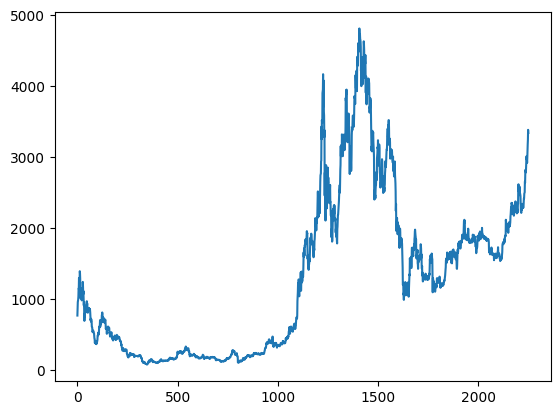

In [3]:
import matplotlib.pyplot as plt
plt.plot(Data)

In [4]:
import numpy as np
Data

0        772.640991
1        884.443970
2        962.719971
3        980.921997
4        997.719971
           ...     
2246    3112.697266
2247    3178.993652
2248    3244.519287
2249    3385.703857
2250    3341.919678
Name: Close, Length: 2251, dtype: float64

In [5]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range = (0,1))
Data = scalar.fit_transform(np.array(Data).reshape(-1,1))
print(Data)

[[0.14559324]
 [0.16924134]
 [0.18579795]
 ...
 [0.66843457]
 [0.69829734]
 [0.68903629]]


In [6]:
training_size = int(len(Data)*0.75)
test_size = len(Data)-training_size
train_data, test_data = Data[0:training_size,:], Data[training_size:len(Data),:1]
training_size, test_size

(1688, 563)

In [7]:
train_data

array([[0.14559324],
       [0.16924134],
       [0.18579795],
       ...,
       [0.40125146],
       [0.3918317 ],
       [0.38494181]])

In [8]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step,0])
    return numpy.array(dataX), numpy.array(dataY) 

In [9]:
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [10]:
print(X_train.shape), print(Y_train.shape)

(1587, 100)
(1587,)


(None, None)

In [11]:
print(X_test.shape), print(Y_test.shape)

(462, 100)
(462,)


(None, None)

In [12]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [14]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")

C:\Users\91636\Desktop\project\my_kernal\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.fit(X_train,Y_train, validation_data=(X_test,Y_test),epochs=100,batch_size = 64, verbose = 1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 0.0493 - val_loss: 0.0011
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0029 - val_loss: 0.0013
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0023 - val_loss: 0.0015
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0021 - val_loss: 0.0010
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0021 - val_loss: 0.0012
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0021 - val_loss: 8.7180e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0019 - val_loss: 9.6310e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0017 - val_loss: 8.7087e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0017 - val_loss: 7.6019e-04
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0013 - val_loss: 7.4269e-04
Epoch 12/100
25/25 ━━━━━━━━━━━━━

In [17]:
import tensorflow as tf

In [20]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [21]:
train_predict = scalar.inverse_transform(train_predict)
test_predict = scalar.inverse_transform(test_predict)

In [22]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train, train_predict))

1640.2996480217416

In [23]:
math.sqrt(mean_squared_error(Y_test, test_predict))

1805.5282984116814

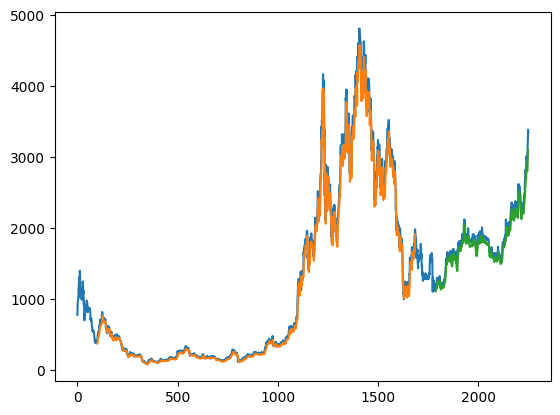

In [24]:
look_back = 100
trainPredictPlot = numpy.empty_like(Data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = numpy.empty_like(Data)
testPredictPlot[:,:] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(Data)-1,:] = test_predict
plt.plot(scalar.inverse_transform(Data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [25]:
len(test_data)

563

In [27]:
x_input = test_data[463:].reshape(1,-1)
x_input.shape

(1, 100)

In [28]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [29]:
temp_input

[0.418826039162245,
 0.4183576162621164,
 0.4223640231976607,
 0.4230537732741526,
 0.4185850888186568,
 0.41099827602647726,
 0.4156348668037791,
 0.41152957009578184,
 0.4163155282576774,
 0.4236305360498372,
 0.44024810790303454,
 0.4461679166277021,
 0.4566430612758835,
 0.4673512555178165,
 0.45419911397188695,
 0.4808328060663839,
 0.48107654503433556,
 0.4773630379930021,
 0.4797504915408372,
 0.4527010490578533,
 0.44793331975100104,
 0.46033038710248064,
 0.47216055487174446,
 0.4515923984880016,
 0.45319761561635025,
 0.44675795075100955,
 0.4511558374825645,
 0.44282192887207195,
 0.44790651879495824,
 0.4558660918114392,
 0.47426424875781836,
 0.470567266600209,
 0.46139715796611924,
 0.4628501930690668,
 0.4541576473560396,
 0.48530856509098497,
 0.4787148077894991,
 0.46879990124479387,
 0.466975525823139,
 0.4647346768404623,
 0.47972198661347526,
 0.48046409933095546,
 0.4497785576109782,
 0.46210487863685734,
 0.46202220366595953,
 0.45630652609428407,
 0.4523387457518

In [30]:
from numpy import array
lst_output = []
n_steps = 100
i = 0
while (i<30):
    if(len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(1,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape (1, n_steps, 1)
        yhat = model.predict(x_input, verbose = 0)
        print("{} day output {}". format (i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose = 0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i+1
print(lst_output)

[0.66088265]
101
1 day input [0.41835762 0.42236402 0.42305377 0.41858509 0.41099828 0.41563487
 0.41152957 0.41631553 0.42363054 0.44024811 0.44616792 0.45664306
 0.46735126 0.45419911 0.48083281 0.48107655 0.47736304 0.47975049
 0.45270105 0.44793332 0.46033039 0.47216055 0.4515924  0.45319762
 0.44675795 0.45115584 0.44282193 0.44790652 0.45586609 0.47426425
 0.47056727 0.46139716 0.46285019 0.45415765 0.48530857 0.47871481
 0.4687999  0.46697553 0.46473468 0.47972199 0.4804641  0.44977856
 0.46210488 0.4620222  0.45630653 0.45233875 0.47564075 0.47813546
 0.52832316 0.53625831 0.51613069 0.52715864 0.50508555 0.51336059
 0.52950504 0.51695755 0.50398093 0.50873575 0.50452459 0.50120886
 0.47094377 0.45610797 0.45460108 0.45124822 0.46171603 0.46186119
 0.45960279 0.47226316 0.47806492 0.46496168 0.4694628  0.470354
 0.46781586 0.46644266 0.4684188  0.48392566 0.49482786 0.49401593
 0.50831633 0.51121677 0.51255827 0.544401   0.54103141 0.56973771
 0.57956824 0.57519251 0.57159276 0

9 day output [[0.44517034]]
1 day input [0.44024811 0.44616792 0.45664306 0.46735126 0.45419911 0.48083281
 0.48107655 0.47736304 0.47975049 0.45270105 0.44793332 0.46033039
 0.47216055 0.4515924  0.45319762 0.44675795 0.45115584 0.44282193
 0.44790652 0.45586609 0.47426425 0.47056727 0.46139716 0.46285019
 0.45415765 0.48530857 0.47871481 0.4687999  0.46697553 0.46473468
 0.47972199 0.4804641  0.44977856 0.46210488 0.4620222  0.45630653
 0.45233875 0.47564075 0.47813546 0.52832316 0.53625831 0.51613069
 0.52715864 0.50508555 0.51336059 0.52950504 0.51695755 0.50398093
 0.50873575 0.50452459 0.50120886 0.47094377 0.45610797 0.45460108
 0.45124822 0.46171603 0.46186119 0.45960279 0.47226316 0.47806492
 0.46496168 0.4694628  0.470354   0.46781586 0.46644266 0.4684188
 0.48392566 0.49482786 0.49401593 0.50831633 0.51121677 0.51255827
 0.544401   0.54103141 0.56973771 0.57956824 0.57519251 0.57159276
 0.59112105 0.60478003 0.61957111 0.61044459 0.61058247 0.60014435
 0.61510439 0.64055213 

20 day output [[0.31488895]]
1 day input [0.46033039 0.47216055 0.4515924  0.45319762 0.44675795 0.45115584
 0.44282193 0.44790652 0.45586609 0.47426425 0.47056727 0.46139716
 0.46285019 0.45415765 0.48530857 0.47871481 0.4687999  0.46697553
 0.46473468 0.47972199 0.4804641  0.44977856 0.46210488 0.4620222
 0.45630653 0.45233875 0.47564075 0.47813546 0.52832316 0.53625831
 0.51613069 0.52715864 0.50508555 0.51336059 0.52950504 0.51695755
 0.50398093 0.50873575 0.50452459 0.50120886 0.47094377 0.45610797
 0.45460108 0.45124822 0.46171603 0.46186119 0.45960279 0.47226316
 0.47806492 0.46496168 0.4694628  0.470354   0.46781586 0.46644266
 0.4684188  0.48392566 0.49482786 0.49401593 0.50831633 0.51121677
 0.51255827 0.544401   0.54103141 0.56973771 0.57956824 0.57519251
 0.57159276 0.59112105 0.60478003 0.61957111 0.61044459 0.61058247
 0.60014435 0.61510439 0.64055213 0.65457486 0.66843457 0.69829734
 0.68903629 0.66088265 0.63355398 0.60590088 0.57901001 0.55309993
 0.52842093 0.50517422

In [31]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)
print(day_pred)

[101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130]


In [32]:
import matplotlib.pyplot as plt
len(Data)

2251

In [33]:
df3 = Data.tolist()
df3.extend(lst_output)

In [34]:
print(scalar.inverse_transform(lst_output))

[[3208.81548873]
 [3079.61157359]
 [2948.87383414]
 [2821.73972233]
 [2699.24258994]
 [2582.56570505]
 [2472.66041635]
 [2370.23107693]
 [2275.6626223 ]
 [2188.97534188]
 [2109.84037788]
 [2037.6614466 ]
 [1971.66318195]
 [1910.99145543]
 [1854.78636167]
 [1802.23914159]
 [1752.63092951]
 [1705.34923837]
 [1659.89613182]
 [1615.88456087]
 [1573.0337142 ]
 [1531.14957418]
 [1490.11829458]
 [1449.88619296]
 [1410.44833785]
 [1371.83135914]
 [1334.0847123 ]
 [1297.26701122]
 [1261.43933555]
 [1226.65734029]]


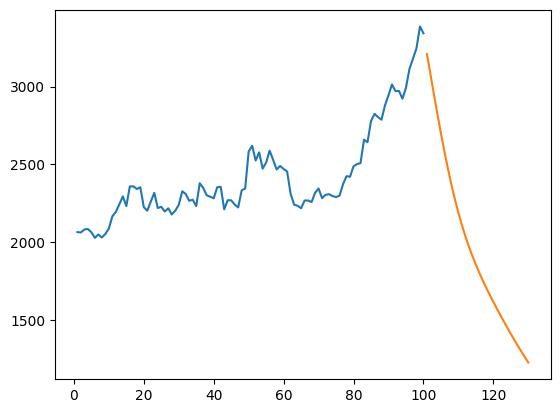

In [35]:
plt.plot(day_new,scalar.inverse_transform(Data[2151:]))
plt.plot(day_pred,scalar.inverse_transform(lst_output))

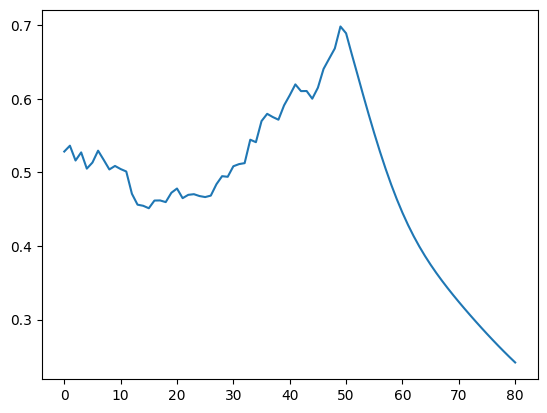

In [36]:
df3=Data.tolist()
df3.extend(lst_output)
plt.plot(df3[2200:])

In [38]:
df3=scalar.inverse_transform(df3).tolist()

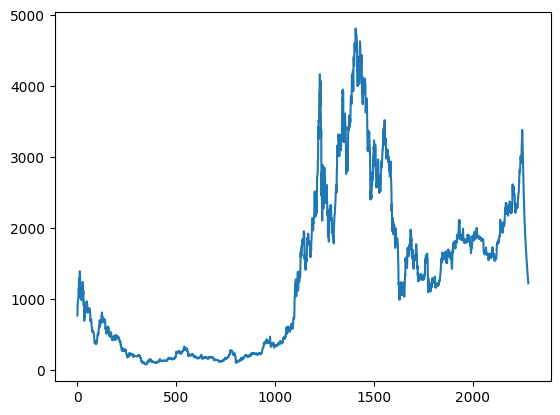

In [39]:
plt.plot(df3)